In [3]:
from tensorflow import keras 

In [6]:
import numpy as np

In [10]:
from matplotlib import pyplot as plt

In [7]:
# 1.观察数据

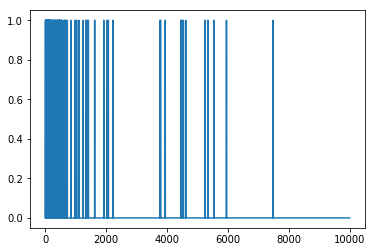

In [11]:
NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)
plt.plot(train_data[0])


In [12]:
# 防止过度拟合的最简单方法是减小模型的大小，即模型中可学习参数的数量。

# 深度学习模型往往善于适应训练数据，但真正的挑战是概括，而不是适合。

# 另一方面，如果网络具有有限的记忆资源，则将不能容易地学习映射。为了最大限度地减少损失，它必须学习具有更强预测能力的压缩表示。同时，如果您使模型太小，则难以适应训练数据。 “太多容量”和“容量不足”之间存在平衡。

# 要找到合适的模型大小，最好从相对较少的图层和参数开始，然后开始增加图层的大小或添加新图层，直到看到验证损失的收益递减为止。

# 我们将在电影评论分类网络上使用Dense图层作为基线创建一个简单模型，然后创建更小和更大的版本，并进行比较。


In [13]:
# 2.创建一个baseline模型

In [14]:
import tensorflow.keras.layers as layers
baseline_model = keras.Sequential(
[
    layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
]
)
baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [15]:
baseline_history = baseline_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)


W0710 07:46:01.880556 140516937017088 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 7s - loss: 0.5009 - accuracy: 0.8009 - binary_crossentropy: 0.5009 - val_loss: 0.3518 - val_accuracy: 0.8724 - val_binary_crossentropy: 0.3518
Epoch 2/20
25000/25000 - 5s - loss: 0.2622 - accuracy: 0.9082 - binary_crossentropy: 0.2622 - val_loss: 0.2860 - val_accuracy: 0.8879 - val_binary_crossentropy: 0.2860
Epoch 3/20
25000/25000 - 5s - loss: 0.1910 - accuracy: 0.9320 - binary_crossentropy: 0.1910 - val_loss: 0.2847 - val_accuracy: 0.8864 - val_binary_crossentropy: 0.2847
Epoch 4/20
25000/25000 - 6s - loss: 0.1546 - accuracy: 0.9464 - binary_crossentropy: 0.1546 - val_loss: 0.3059 - val_accuracy: 0.8800 - val_binary_crossentropy: 0.3059
Epoch 5/20
25000/25000 - 6s - loss: 0.1283 - accuracy: 0.9563 - binary_crossentropy: 0.1283 - val_loss: 0.3244 - val_accuracy: 0.8774 - val_binary_crossentropy: 0.3244
Epoch 6/20
25000/25000 - 5s - loss: 0.1080 - accuracy: 0.9662 - binary_crossentropy: 0.1080 - val_loss: 0.3518

In [16]:
# 3.创建一个小模型

In [17]:
small_model = keras.Sequential(
[
    layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
]
)
small_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
small_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [18]:
small_history = small_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 6s - loss: 0.6478 - accuracy: 0.6197 - binary_crossentropy: 0.6478 - val_loss: 0.5947 - val_accuracy: 0.7872 - val_binary_crossentropy: 0.5947
Epoch 2/20
25000/25000 - 6s - loss: 0.5028 - accuracy: 0.8463 - binary_crossentropy: 0.5028 - val_loss: 0.4381 - val_accuracy: 0.8676 - val_binary_crossentropy: 0.4381
Epoch 3/20
25000/25000 - 5s - loss: 0.3487 - accuracy: 0.8941 - binary_crossentropy: 0.3487 - val_loss: 0.3424 - val_accuracy: 0.8791 - val_binary_crossentropy: 0.3424
Epoch 4/20
25000/25000 - 5s - loss: 0.2612 - accuracy: 0.9147 - binary_crossentropy: 0.2612 - val_loss: 0.2953 - val_accuracy: 0.8869 - val_binary_crossentropy: 0.2953
Epoch 5/20
25000/25000 - 6s - loss: 0.2094 - accuracy: 0.9290 - binary_crossentropy: 0.2094 - val_loss: 0.2830 - val_accuracy: 0.8883 - val_binary_crossentropy: 0.2830
Epoch 6/20
25000/25000 - 5s - loss: 0.1797 - accuracy: 0.9394 - binary_crossentropy: 0.1797 - val_loss: 0.2821

In [ ]:
# 4.创建一个大模型

In [19]:
big_model = keras.Sequential(
[
    layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
]
)
big_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
big_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [20]:
big_history = big_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 7s - loss: 0.3403 - accuracy: 0.8543 - binary_crossentropy: 0.3403 - val_loss: 0.2947 - val_accuracy: 0.8788 - val_binary_crossentropy: 0.2947
Epoch 2/20
25000/25000 - 7s - loss: 0.1377 - accuracy: 0.9497 - binary_crossentropy: 0.1377 - val_loss: 0.3313 - val_accuracy: 0.8715 - val_binary_crossentropy: 0.3313
Epoch 3/20
25000/25000 - 6s - loss: 0.0386 - accuracy: 0.9893 - binary_crossentropy: 0.0386 - val_loss: 0.4602 - val_accuracy: 0.8700 - val_binary_crossentropy: 0.4602
Epoch 4/20
25000/25000 - 4s - loss: 0.0052 - accuracy: 0.9991 - binary_crossentropy: 0.0052 - val_loss: 0.6057 - val_accuracy: 0.8667 - val_binary_crossentropy: 0.6057
Epoch 5/20
25000/25000 - 6s - loss: 5.5434e-04 - accuracy: 1.0000 - binary_crossentropy: 5.5434e-04 - val_loss: 0.6808 - val_accuracy: 0.8695 - val_binary_crossentropy: 0.6808
Epoch 6/20
25000/25000 - 7s - loss: 1.8387e-04 - accuracy: 1.0000 - binary_crossentropy: 1.8387e-04 - 

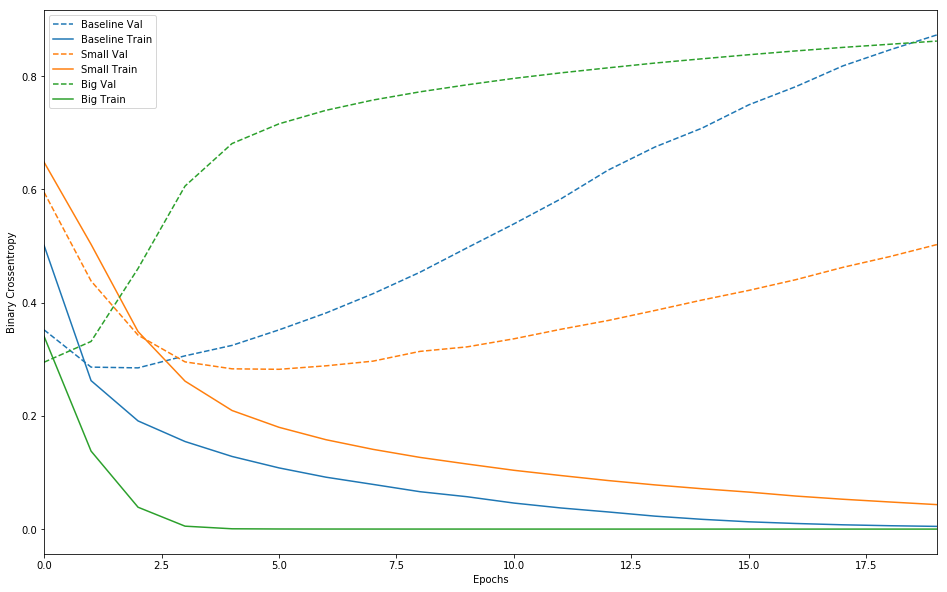

In [21]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('small', small_history),
              ('big', big_history)])


In [22]:
# 请注意，较大的网络在仅仅一个时期之后几乎立即开始过度拟合，并且更过拟合更严重。
# 网络容量越大，能够越快地对训练数据进行建模（导致训练损失低），但过度拟合的可能性越大（导致训练和验证损失之间的差异很大）


In [23]:
# 5.添加l2正则

In [24]:
l2_model = keras.Sequential(
[
    layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), 
                 activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), 
                 activation='relu'),
    layers.Dense(1, activation='sigmoid')
]
)
l2_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
l2_model.summary()
l2_history = l2_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 7s - loss: 0.5427 - accuracy: 0.8074 - binary_crossentropy: 0.5044 - val_loss: 0.3904 - val_accuracy: 0.8736 - val_binary_crossentropy: 0.3494
Epoch 2/20
25000/25000 - 6s - loss: 0.3112 - accuracy: 0.9043 - binary_crossentropy: 0.2646 - val_loss: 0.3374 - val_accuracy: 0.8869 - val_binary_crossentropy:

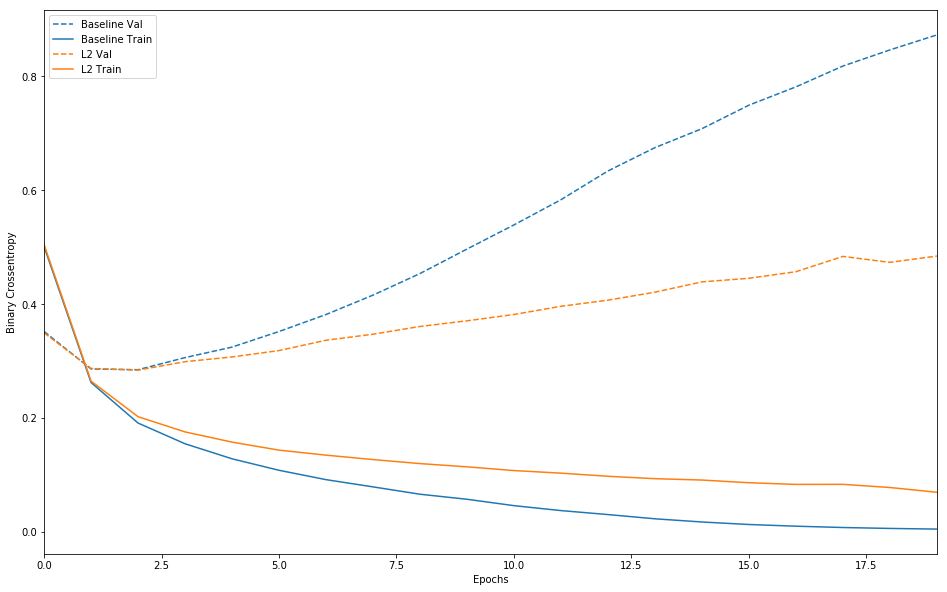

In [26]:
plot_history([('baseline', baseline_history),
              ('l2', l2_history)])


In [25]:
# 6.添加dropout

In [27]:
dpt_model = keras.Sequential(
[
    layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
]
)
dpt_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
dpt_model.summary()
dpt_history = dpt_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.6219 - accuracy: 0.6412 - 

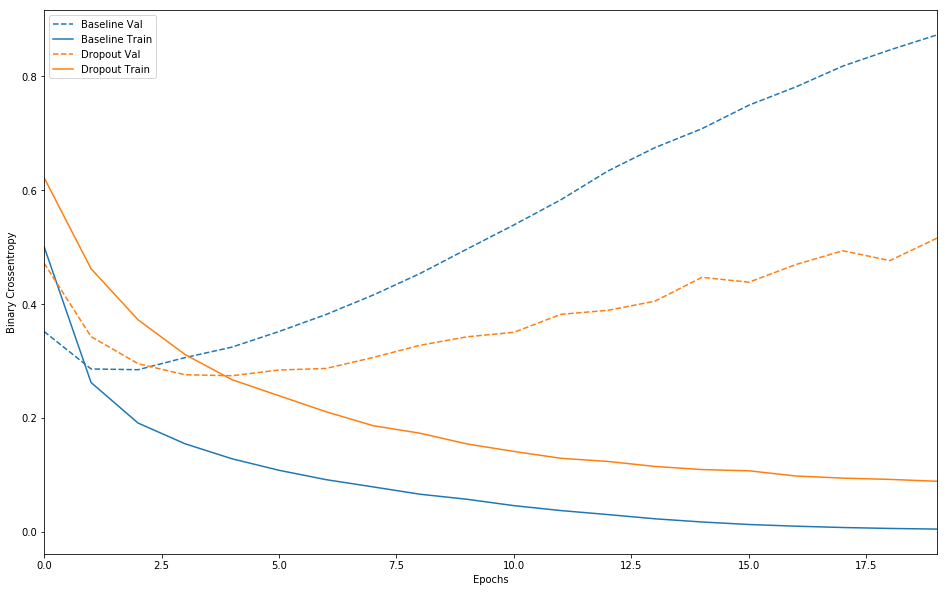

In [28]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_history)])


In [ ]:
# 防止神经网络中过度拟合的最常用方法：

# 获取更多训练数据。
# 减少网络容量。
# 添加权重正规化。
# 添加dropout。